In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
%matplotlib inline
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('/content/Placement_Data_Full_Class.csv')

In [3]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
data.drop(['sl_no'], axis =1, inplace=True)

In [5]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [10]:
data.isna().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [9]:
data.salary.fillna(data.salary.mean(), inplace = True)

In [8]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [36]:
X= df_no_outliers.drop(['status'], axis =1)
y = df_no_outliers.status

In [30]:
import pandas as pd
import numpy as np

def remove_outliers(df, threshold=3):
    """
    Remove outliers from numerical columns in a DataFrame using Z-score.

    Parameters:
    - df: pandas DataFrame
        The input DataFrame with numerical columns.
    - threshold: float, optional (default=3)
        The Z-score threshold beyond which data points are considered outliers.

    Returns:
    - df_no_outliers: pandas DataFrame
        DataFrame with outliers removed.
    """
    df_no_outliers = df.copy()

    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
            df_no_outliers = df_no_outliers[(z_scores < threshold) | (pd.isnull(df_no_outliers[col]))]

    return df_no_outliers

# Example usage:
# Assuming df is your DataFrame
df_no_outliers = remove_outliers(data)


<ipython-input-30-933a4d690795>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[(z_scores < threshold) | (pd.isnull(df_no_outliers[col]))]
<ipython-input-30-933a4d690795>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[(z_scores < threshold) | (pd.isnull(df_no_outliers[col]))]
<ipython-input-30-933a4d690795>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[(z_scores < threshold) | (pd.isnull(df_no_outliers[col]))]


In [66]:
y.value_counts()

Placed        144
Not Placed     67
Name: status, dtype: int64

In [32]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X.select_dtypes(exclude="object"))

VarianceThreshold(threshold=0)

In [33]:
var_thres.get_support()


array([ True,  True,  True,  True,  True,  True])

In [37]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [38]:
corr_features = correlation(X.select_dtypes(exclude="object"), 0.8)
len(set(corr_features))

0

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 20)


In [49]:
x_train.shape, x_test.shape

((168, 15), (43, 15))

In [50]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.21762777, 0.15929337, 0.22386995, 0.        , 0.02424286,
       0.57115623, 0.00766374, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00099837, 0.00288799, 0.01448208])

In [52]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

salary                   0.571156
degree_p                 0.223870
ssc_p                    0.217628
hsc_p                    0.159293
mba_p                    0.024243
specialisation_Mkt&HR    0.014482
gender_M                 0.007664
workex_Yes               0.002888
degree_t_Sci&Tech        0.000998
etest_p                  0.000000
ssc_b_Others             0.000000
hsc_b_Others             0.000000
hsc_s_Commerce           0.000000
hsc_s_Science            0.000000
degree_t_Others          0.000000
dtype: float64

In [53]:
from sklearn.feature_selection import SelectKBest


In [54]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(x_train, y_train)
x_train.columns[sel_five_cols.get_support()]

Index(['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'salary', 'ssc_b_Others',
       'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes',
       'specialisation_Mkt&HR'],
      dtype='object')

In [57]:
x_test = x_test[['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'salary', 'ssc_b_Others',
       'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes',
       'specialisation_Mkt&HR']]

In [58]:
num_features = x_train.select_dtypes(exclude = "object")
cat_features = x_train.select_dtypes(include = "object")

In [59]:
x_train

,ssc_p,hsc_p,degree_p,mba_p,salary,ssc_b_Others,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
59,52.6,65.58,72.11,56.66,265000.000000,0,0,1,0,0
91,52.0,57.00,50.80,62.79,288655.405405,0,0,0,0,1
196,72.0,63.00,77.50,54.48,250000.000000,1,0,1,1,0
97,70.5,62.50,61.00,69.03,288655.405405,0,0,0,0,0
160,87.0,74.00,65.00,72.29,300000.000000,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
149,44.0,58.00,55.00,58.54,288655.405405,0,0,0,1,1
138,82.0,64.00,73.00,71.77,250000.000000,1,0,1,1,0
158,67.0,63.00,64.00,61.87,288655.405405,1,0,1,0,0
15,65.0,75.00,69.00,64.66,200000.000000,0,0,0,1,0


In [61]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import (
    LogisticRegression,
    RidgeClassifier,
    SGDClassifier,
    PassiveAggressiveClassifier,
    Perceptron,
)
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import (
    KNeighborsClassifier,
    RadiusNeighborsClassifier,
    NearestCentroid,
)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    VotingClassifier,
)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    BaggingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate  # Import the tabulate library
from sklearn.neural_network import MLPClassifier



step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder( sparse = False,drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', StandardScaler(),num_features.columns )
    ],
    remainder='passthrough'
)

In [62]:
step1

ColumnTransformer(remainder='passthrough',
                  transformers=[('col_tnf',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 Index([], dtype='object')),
                                ('num_tnf', StandardScaler(),
                                 Index(['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'salary', 'ssc_b_Others',
       'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes',
       'specialisation_Mkt&HR'],
      dtype='object'))])

In [84]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from tqdm import tqdm
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LSTM, GRU, Embedding, SimpleRNN, Dropout


# Ignore all warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import *

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Preprocess 'previous_year_rating' column


    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred,  average="macro")
    f1 = f1_score(y_test, y_pred,  average="macro")

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm


# Initialize different classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'HistGradientBoosting Classifier': HistGradientBoostingClassifier(),
    'SGD Classifier': SGDClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'MLP Neural Network': MLPClassifier(hidden_layer_sizes=(10,), max_iter=100),

}
# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models
for model_name, model in tqdm(models.items()):
    accuracy, precision, recall, f1, cm = evaluate_model(model, x_train, y_train, x_test, y_test)
    results.append([model_name, accuracy, precision, recall, f1, cm])

# Print the results in a tabular form
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"]
print(tabulate(results, headers, tablefmt="grid"))

max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")

100%|██████████| 15/15 [00:00<00:00, 28.54it/s]

+---------------------------------+------------+-------------+----------+------------+--------------------+
| Model                           |   Accuracy |   Precision |   Recall |   F1 Score | Confusion Matrix   |
+=================================+============+=============+==========+============+====================+
| Logistic Regression             |   0.860465 |    0.874242 | 0.804187 |   0.826613 | [[ 9  5]           |
|                                 |            |             |          |            |  [ 1 28]]          |
+---------------------------------+------------+-------------+----------+------------+--------------------+
| Random Forest Classifier        |   1        |    1        | 1        |   1        | [[14  0]           |
|                                 |            |             |          |            |  [ 0 29]]          |
+---------------------------------+------------+-------------+----------+------------+--------------------+
| Gradient Boosting Classifi

+--------------------------+----------+----------+------------+-------------+-----------+------------+---------------------------------+------------------------------------+
|                          |          |    Model |   Accuracy |   Precision | Recall    |   F1 Score | Confusion Matrix                | AUC                                |
+==========================+==========+==========+============+=============+===========+============+=================================+====================================+
| Random Forest Classifier | 0.976744 | 0.983333 |   0.964286 |    0.973007 | [[29  0]  |   0.964286 | [0.3255814 1.        1.       ] | [1.         0.92857143 0.        ] |
|                          |          |          |            |             |  [ 1 13]] |            |                                 |                                    |
+--------------------------+----------+----------+------------+-------------+-----------+------------+----------------------------

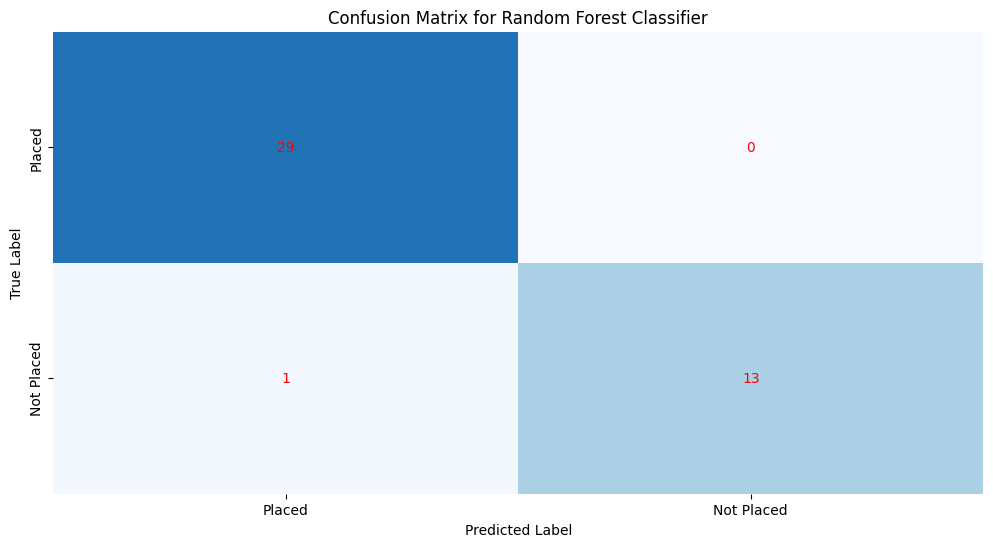

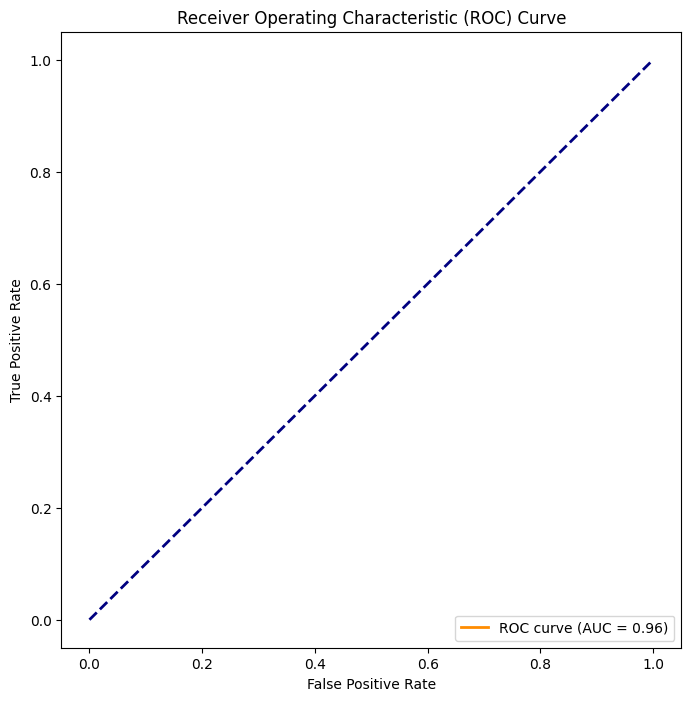

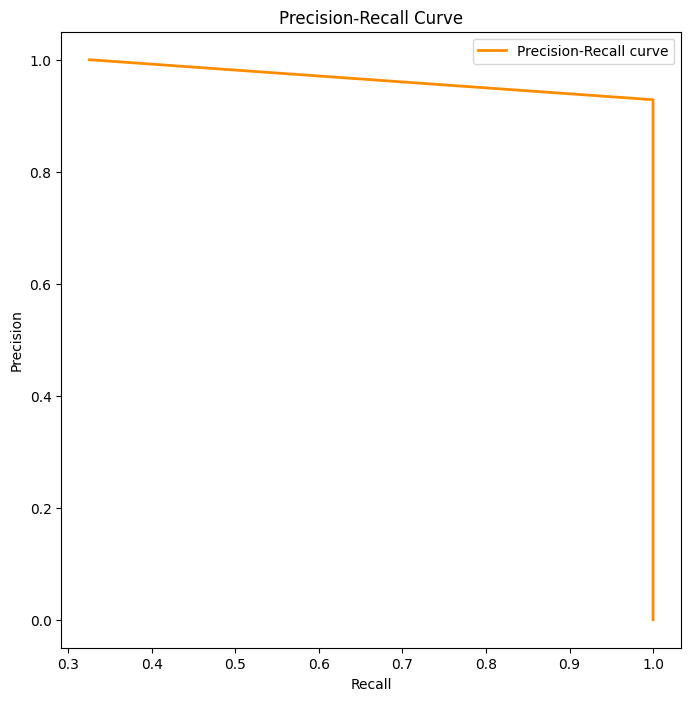

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define your class labels (replace with your actual class labels)
class_labels = ['Placed', 'Not Placed']

# Define your step1 transformer (replace with your actual transformer)

def evaluate_model(model, x_train, y_train, x_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    # Convert string labels to binary labels
    label_mapping = {label: idx for idx, label in enumerate(class_labels)}
    y_test_binary = np.array([label_mapping[label] for label in y_test])
    y_pred_binary = np.array([label_mapping[label] for label in y_pred])

    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    precision = precision_score(y_test_binary, y_pred_binary, average="macro")
    recall = recall_score(y_test_binary, y_pred_binary, average="macro")
    f1 = f1_score(y_test_binary, y_pred_binary, average="macro")

    # Calculate the confusion matrix with class labels
    cm = confusion_matrix(y_test_binary, y_pred_binary)

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
    roc_auc = auc(fpr, tpr)

    # Calculate Precision-Recall curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_test_binary, y_pred_binary)

    return accuracy, precision, recall, f1, cm, fpr, tpr, roc_auc, precision_curve, recall_curve

# Initialize different classification models
models = {
    'Random Forest Classifier': RandomForestClassifier(**Hyperparameters),
}

# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models
for model_name, model in models.items():
    accuracy, precision, recall, f1, cm, fpr, tpr, roc_auc, precision_curve, recall_curve = evaluate_model(model, x_train, y_train, x_test, y_test)
    results.append([model_name, accuracy, precision, recall, f1, cm, roc_auc, precision_curve, recall_curve])


# Print the results in a tabular form
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix", "AUC"]
print(tabulate(results, headers, tablefmt="grid"))

max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")

# Plot confusion matrix with class labels and show labels
plt.figure(figsize=(12, 6))

# Show diagonal elements in red color
sns.heatmap(results[max_accuracy_index][5], annot=True, fmt="d", cmap="Blues", cbar=False, vmin=0, vmax=results[max_accuracy_index][5].diagonal().max() + 10, annot_kws={"color": "red"})

plt.title(f"Confusion Matrix for {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(results[max_accuracy_index][4], results[max_accuracy_index][3], color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(results[max_accuracy_index][6]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(8, 8))
plt.plot(results[max_accuracy_index][7], results[max_accuracy_index][8], color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [90]:
model

RandomForestClassifier(n_estimators=50)

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification

# Assuming you have your data (X, y) ready
# If not, you can use a dummy dataset for testing purposes
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets

# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_rf_model.score(x_test, y_test)
print("Accuracy on Test Set:", accuracy)


Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy on Test Set: 1.0


In [71]:
Hyperparameters =  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

In [72]:
Hyperparameters

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}